In [1]:
import warnings
warnings.filterwarnings('ignore')

# Diversified portfolio

This activity will involve calculating daily return data, standard deviation, annualized standard deviation, and Sharpe ratios as you analyze the risk and return metrics of 4 promising cryptocurrencyes:Bitcoin(BTC), Eyherium (ETH), Ripple (XPR), Litecoin (LTC);
as well as 3 flagman indexes: Dow Jones(DJIA), SnP500, NASDAQ100

Instructions:

PART I.

1. Collect and organize data.


2. Analyze and visualize the data. Calculate Daily return, Mean, Cumulative return, STD of the portfolio. Use hvplot to create interactive visualizations 


3. Analyze risk. Calculate the annualized average daily return values, Standard deviations. Calculate and plot Sharpe ratio

PART II.

Step 4. Financial Planning with JSON for Crypto
Step 5. Alpaca API call. Review the total number of shares held in indexes (SPY), (DIA) and (QQQ).
Step 6. Create a pie visualization of resulting portfolio.

References:

[Pandas std function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.std.html)

[NumPy sqrt function](https://numpy.org/doc/stable/reference/generated/numpy.sqrt.html)

[Pandas plot.bar function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html)


## Step 1: Collect and organize data.

## Import the required libraries and dependencies.

In [2]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import hvplot.pandas
import seaborn as sns


%matplotlib inline

##  Using the `read_csv` function and the `Path` module, read the csv files into a Pandas DataFrame, set a `DateTimeIndex`. Create and review the DataFrame for each asset class 

In [3]:
#Load the data for BTC
#Store the data into dataframes
#Print first and last 5 rows of each dataframe

btc_df =  pd.read_csv(Path("./Resources/BTC_USD_2013-09-30_2021-05-13-CoinDesk.csv"),
    index_col="Date",  
    parse_dates=True, 
    infer_datetime_format=True)

display(btc_df.head(-5) )

Currency  Closing Price (USD)  24h Open (USD)  24h High (USD)  \
Date                                                                       
2013-09-30      BTC           123.654990      124.304660      124.751660   
2013-10-01      BTC           125.455000      123.654990      125.758500   
2013-10-02      BTC           108.584830      125.455000      125.665660   
2013-10-03      BTC           118.674660      108.584830      118.675000   
2013-10-04      BTC           121.338660      118.674660      121.936330   
...             ...                  ...             ...             ...   
2021-05-04      BTC         53658.843121    57218.805329    57246.891191   
2021-05-05      BTC         57252.702185    53270.229118    57977.613423   
2021-05-06      BTC         56583.849879    57459.052175    58368.682092   
2021-05-07      BTC         57107.120672    56439.133399    58724.110778   
2021-05-08      BTC         58788.209679    57419.147888    59575.463115   

            24h Low (USD)  
Date                       
2013-09-30     122.563490  
2013-10-01     123.633830  
2013-10-02      83.328330  
2013-10-03     107.058160  
2013-10-04     118.005660  
...                   ...  
2021-05-04   53613.595218  
2021-05-05   52987.158660  
2021-05-06   55330.727863  
2021-05-07   55320.958118  
2021-05-08   57028.498049  

[2778 rows x 5 columns]

In [4]:
#Load the data for ETH
#Store the data into dataframes
#Print first and last 5 rows of each dataframe

eth_df = pd.read_csv(Path("./Resources/ETH_USD_2015-08-08_2021-05-13-CoinDesk.csv"),
    index_col="Date",  
    parse_dates=True, 
    infer_datetime_format=True)

display(eth_df.head(-5) )

Currency  Closing Price (USD)  24h Open (USD)  24h High (USD)  \
Date                                                                       
2015-08-08      ETH             0.909046        1.749289        1.916540   
2015-08-09      ETH             0.692321        0.909046        0.909046   
2015-08-10      ETH             0.668067        0.692321        0.692321   
2015-08-11      ETH             0.850151        0.668067        1.148621   
2015-08-12      ETH             1.266023        0.850151        1.266023   
...             ...                  ...             ...             ...   
2021-05-04      ETH          3266.445548     3433.202285     3530.386628   
2021-05-05      ETH          3495.968343     3242.697268     3520.568716   
2021-05-06      ETH          3541.930575     3526.128072     3605.498436   
2021-05-07      ETH          3445.426739     3492.157543     3589.900862   
2021-05-08      ETH          3882.805260     3486.440013     3962.118330   

            24h Low (USD)  
Date                       
2015-08-08       0.794497  
2015-08-09       0.692321  
2015-08-10       0.654331  
2015-08-11       0.668067  
2015-08-12       0.850151  
...                   ...  
2021-05-04    3174.547411  
2021-05-05    3213.386842  
2021-05-06    3381.013116  
2021-05-07    3361.436536  
2021-05-08    3456.990603  

[2101 rows x 5 columns]

In [5]:
#Load the data for XRP
#Store the data into dataframes
#Print first and last 5 rows of each dataframe

xrp_df = pd.read_csv(Path("./Resources/XRP_USD_2018-05-31_2021-05-13-CoinDesk.csv"),
    index_col="Date",  
    parse_dates=True, 
    infer_datetime_format=True)

display(xrp_df.head(-5) )


Currency  Closing Price (USD)  24h Open (USD)  24h High (USD)  \
Date                                                                       
2018-05-31      XRP             0.609705        0.616405        0.618404   
2018-06-01      XRP             0.617604        0.614872        0.621169   
2018-06-02      XRP             0.643043        0.624189        0.650921   
2018-06-03      XRP             0.667634        0.644291        0.677069   
2018-06-04      XRP             0.669680        0.690562        0.706326   
...             ...                  ...             ...             ...   
2021-05-04      XRP             1.394571        1.555764        1.558665   
2021-05-05      XRP             1.590046        1.389193        1.608413   
2021-05-06      XRP             1.639602        1.613795        1.764392   
2021-05-07      XRP             1.550022        1.603835        1.692895   
2021-05-08      XRP             1.589197        1.583141        1.629630   

            24h Low (USD)  
Date                       
2018-05-31       0.607282  
2018-06-01       0.608681  
2018-06-02       0.618503  
2018-06-03       0.640769  
2018-06-04       0.643054  
...                   ...  
2021-05-04       1.343032  
2021-05-05       1.369421  
2021-05-06       1.530335  
2021-05-07       1.510212  
2021-05-08       1.545000  

[1074 rows x 5 columns]

In [6]:
#Load the data for LTC
#Store the data into dataframes
#Print first and last 5 rows of each dataframe

ltc_df = pd.read_csv(Path("./Resources/LTC_USD_2018-05-31_2021-05-13-CoinDesk.csv"),
    index_col="Date",  
    parse_dates=True, 
    infer_datetime_format=True)

display(ltc_df.head(-5) )


Currency  Closing Price (USD)  24h Open (USD)  24h High (USD)  \
Date                                                                       
2018-05-31      LTC           117.475053      118.974662      119.628628   
2018-06-01      LTC           119.934676      118.307052      120.452653   
2018-06-02      LTC           123.222694      120.171853      124.229394   
2018-06-03      LTC           125.365456      123.500674      127.920242   
2018-06-04      LTC           119.522003      124.869538      126.883812   
...             ...                  ...             ...             ...   
2021-05-04      LTC           304.168470      294.982485      327.686388   
2021-05-05      LTC           352.951239      305.540635      359.902613   
2021-05-06      LTC           343.844060      356.146518      364.764663   
2021-05-07      LTC           334.733168      354.637617      372.828513   
2021-05-08      LTC           350.084604      345.593016      357.223496   

            24h Low (USD)  
Date                       
2018-05-31     117.006761  
2018-06-01     117.390816  
2018-06-02     118.542360  
2018-06-03     122.112908  
2018-06-04     118.303633  
...                   ...  
2021-05-04     275.601134  
2021-05-05     301.440584  
2021-05-06     323.245237  
2021-05-07     334.489012  
2021-05-08     335.182769  

[1074 rows x 5 columns]

In [7]:
#Load the data for sp500
#Store the data into dataframes
#Print first and last 5 rows of each dataframe

sp500_df = pd.read_csv(Path("./Resources/SP500.csv"),
    index_col="Date", 
    dtype={
       "Closing Price (USD)":np.float64
    },
    parse_dates=True, 
    infer_datetime_format=True)

display(sp500_df.head(-5))

Closing Price (USD)
Date                           
2016-05-13              2046.61
2016-05-16              2066.66
2016-05-17              2047.21
2016-05-18              2047.63
2016-05-19              2040.04
...                         ...
2021-04-30              4181.17
2021-05-03              4192.66
2021-05-04              4164.66
2021-05-05              4167.59
2021-05-06              4201.62

[1254 rows x 1 columns]

In [8]:
#Load the data for Dow Jones
#Store the data into dataframes
#Print first and last 5 rows of each dataframe

djia_df = pd.read_csv(Path("./Resources/DJIA.csv"),
    index_col="Date", 
    dtype={
       "Closing Price (USD)":np.float64
    },
    parse_dates=True, 
    infer_datetime_format=True)

display(djia_df.head(-5))

Closing Price (USD)
Date                           
2016-05-13             17535.32
2016-05-16             17710.71
2016-05-17             17529.98
2016-05-18             17526.62
2016-05-19             17435.40
...                         ...
2021-04-30             33874.85
2021-05-03             34113.23
2021-05-04             34133.03
2021-05-05             34230.34
2021-05-06             34548.53

[1254 rows x 1 columns]

In [9]:
#Load the data for NASDAQ 100
#Store the data into dataframes
#Print first and last 5 rows of each dataframe
nasdaq100_df = pd.read_csv(Path("./Resources/NASDAQ100.csv"),
    index_col="Date", 
    dtype={
       "Closing Price (USD)":np.float64
    },
    parse_dates=True, 
    infer_datetime_format=True)

display(nasdaq100_df.head(-5))

Closing Price (USD)
Date                           
2016-05-16              4380.48
2016-05-17              4322.56
2016-05-18              4338.23
2016-05-19              4315.58
2016-05-20              4362.90
...                         ...
2021-05-03             13799.72
2021-05-04             13544.67
2021-05-05             13503.37
2021-05-06             13613.73
2021-05-07             13719.63

[1255 rows x 1 columns]

##  Select time period: slice the data: from 2018-05-31 up to a current date. Work on columns name and format to make sure they match

In [10]:
#Choose a timeperiod for analized data: from 2018-05-31 up to a current date
#Display new data frame

star_date_btc = btc_df.loc["2018-05-31" :]

star_date_eth = eth_df.loc["2018-05-31" :] 

star_date_xrp = xrp_df.loc["2018-05-31" :]

star_date_ltc = ltc_df.loc["2018-05-31" :]

start_date_sp500_df = sp500_df.loc["2018-05-31" :]

start_date_djia_df = djia_df.loc["2018-05-31" :]

start_date_nasdaq100_df = nasdaq100_df.loc["2018-05-31" :]



In [11]:
#Modyfy names for a colunms for indexes to be able to merge dataframes
#Display resulting dataframes

start_date_sp500_df['Currency'] = "SP500"
start_date_sp500_df = start_date_sp500_df.reindex(columns=['Currency', 'Closing Price (USD)'])
display(start_date_sp500_df.head())


start_date_djia_df['Currency'] = "DJIA"
start_date_djia_df = start_date_djia_df .reindex(columns=['Currency', 'Closing Price (USD)'])
display(start_date_djia_df.head())



start_date_nasdaq100_df['Currency'] = "NASDAQ100"
start_date_nasdaq100_df = start_date_nasdaq100_df.reindex(columns=['Currency', 'Closing Price (USD)'])
display(start_date_nasdaq100_df.head())


Currency  Closing Price (USD)
Date                                    
2018-05-31    SP500              2705.27
2018-06-01    SP500              2734.62
2018-06-04    SP500              2746.87
2018-06-05    SP500              2748.80
2018-06-06    SP500              2772.35

Currency  Closing Price (USD)
Date                                    
2018-05-31     DJIA             24415.84
2018-06-01     DJIA             24635.21
2018-06-04     DJIA             24813.69
2018-06-05     DJIA             24799.98
2018-06-06     DJIA             25146.39

Currency  Closing Price (USD)
Date                                      
2018-05-31  NASDAQ100             6967.730
2018-06-01  NASDAQ100             7083.926
2018-06-04  NASDAQ100             7143.570
2018-06-05  NASDAQ100             7166.754
2018-06-06  NASDAQ100             7210.082

##  Create a new dataframe closing_prices_df which holds all closing prices of all of the assets using Pandas `concat` function.

In [12]:
# Create a new index for column names for crypto part of the portfolio

btc_closing_prices = star_date_btc.loc[:,["Currency","Closing Price (USD)"]]

eth_closing_prices = star_date_eth.loc[:,["Currency","Closing Price (USD)"]]

ltc_closing_prices = star_date_ltc.loc[:,["Currency","Closing Price (USD)"]]

xrp_closing_prices =  star_date_xrp.loc[:,["Currency","Closing Price (USD)"]]


In [13]:
#Create a new dataframe holding all of the assets
#Display a new dataframe

crypto_currencies_closing = [btc_closing_prices, eth_closing_prices, ltc_closing_prices, 
                             xrp_closing_prices, start_date_sp500_df, start_date_djia_df, start_date_nasdaq100_df]
crypto_currencies_closing 
closing_prices_df = pd.concat(crypto_currencies_closing) 
closing_prices_df

Currency  Closing Price (USD)
Date                                      
2018-05-31        BTC          7490.621250
2018-06-01        BTC          7518.333329
2018-06-02        BTC          7630.403388
2018-06-03        BTC          7716.145068
2018-06-04        BTC          7505.589277
...               ...                  ...
2021-05-10  NASDAQ100         13359.080000
2021-05-11  NASDAQ100         13351.270000
2021-05-12  NASDAQ100         13001.630000
2021-05-13  NASDAQ100         13109.150000
2021-05-14  NASDAQ100         13393.120000

[6550 rows x 2 columns]

## Step 2: Analyze and visualize the data. Calculate Daily return, Mean, Cumulative return, STD of the portfolio. Use hvplot to create interactive visualizations 

##  Create a new dataframe portfolio_closing_prices_df which holds all closing prices of all of the assets using Pandas `pivot` function. Clean the data with `dropna` function. 

In [14]:
# Use using Pandas `pivot` function to unify columns

portfolio_closing_prices_df = closing_prices_df.pivot(columns="Currency")

In [15]:
# Use using Pandas `dropna` function to clean the data

portfolio_closing_prices_df = portfolio_closing_prices_df.dropna()

In [16]:
# Change types of all of the columns to a float

portfolio_closing_prices_df['Closing Price (USD)'].astype(float)
portfolio_closing_prices_df.dtypes

                     Currency 
Closing Price (USD)  BTC          float64
                     DJIA         float64
                     ETH          float64
                     LTC          float64
                     NASDAQ100    float64
                     SP500        float64
                     XRP          float64
dtype: object

In [17]:
# Describe dataframe portfolio_closing_prices_df which holds all closing prices of all of the assets
portfolio_closing_prices_df.describe(include="all")

Closing Price (USD)                                         \
Currency                 BTC          DJIA          ETH         LTC   
count             744.000000    744.000000   744.000000  744.000000   
mean            13536.041607  27047.162379   461.812059   80.309239   
std             14206.852747   2682.448812   620.397370   56.759866   
min              3212.207081  18591.930000    83.368456   22.864239   
25%              6478.807799  25414.917500   171.343026   46.414786   
50%              8758.926890  26502.800000   226.913026   58.858453   
75%             11267.469496  28325.530000   409.072095   88.159547   
max             63346.789035  34777.760000  4132.757546  371.689785   

                                                 
Currency     NASDAQ100        SP500         XRP  
count       744.000000   744.000000  744.000000  
mean       9131.182586  3116.446895    0.367287  
std        2247.822243   419.026612    0.237358  
min        5899.355000  2237.400000    0.138613  
25%        7401.704250  2817.850000    0.245836  
50%        8013.779000  2978.570000    0.303275  
75%       11085.726500  3348.620000    0.433335  
max       14041.910000  4232.600000    1.809823

In [18]:
portfolio_closing_prices_df=portfolio_closing_prices_df[
            [('Closing Price (USD)',       'BTC'),
            ('Closing Price (USD)',      'XRP'),
            ('Closing Price (USD)',       'ETH'),
            ('Closing Price (USD)',       'LTC'),
            ('Closing Price (USD)', 'NASDAQ100'),
            ('Closing Price (USD)',     'SP500'),
            ('Closing Price (USD)',       'DJIA')]]

In [19]:
# Display the columns of resulting DataFrame to make sure all data loaded correctly into an dataframe
portfolio_closing_prices_df.columns

MultiIndex([('Closing Price (USD)',       'BTC'),
            ('Closing Price (USD)',       'XRP'),
            ('Closing Price (USD)',       'ETH'),
            ('Closing Price (USD)',       'LTC'),
            ('Closing Price (USD)', 'NASDAQ100'),
            ('Closing Price (USD)',     'SP500'),
            ('Closing Price (USD)',      'DJIA')],
           names=[None, 'Currency'])

In [20]:
portfolio_closing_prices_df

Closing Price (USD)                                                \
Currency                   BTC       XRP          ETH         LTC  NASDAQ100   
Date                                                                           
2018-05-31         7490.621250  0.609705   570.865740  117.475053   6967.730   
2018-06-01         7518.333329  0.617604   577.257364  119.934676   7083.926   
2018-06-04         7505.589277  0.669680   591.549075  119.522003   7143.570   
2018-06-05         7624.187971  0.679071   607.829423  122.078669   7166.754   
2018-06-06         7658.570000  0.673526   606.180000  121.484850   7210.082   
...                        ...       ...          ...         ...        ...   
2021-05-07        57107.120672  1.550022  3445.426739  334.733168  13719.630   
2021-05-10        55715.546651  1.416215  3998.913215  367.104435  13359.080   
2021-05-11        56573.555472  1.453975  4132.757546  371.689785  13351.270   
2021-05-12        52147.821187  1.356996  4076.959711  337.157160  13001.630   
2021-05-13        49764.132082  1.340527  3767.087985  312.460183  13109.150   

                               
Currency      SP500      DJIA  
Date                           
2018-05-31  2705.27  24415.84  
2018-06-01  2734.62  24635.21  
2018-06-04  2746.87  24813.69  
2018-06-05  2748.80  24799.98  
2018-06-06  2772.35  25146.39  
...             ...       ...  
2021-05-07  4232.60  34777.76  
2021-05-10  4188.43  34742.82  
2021-05-11  4152.10  34269.16  
2021-05-12  4063.04  33587.66  
2021-05-13  4112.50  34021.45  

[744 rows x 7 columns]

## Visualize closing prices for all the assets using interactive hvplot

In [21]:
#Create hvplot for closing prices with nesessary indexes , include a title, profeccionaly organize the data
portfolio_closing_prices_df['Closing Price (USD)'].hvplot(x='Date',
                                 xlabel="Date", 
                                 title = "Cryptocurrencies",
                                 width = 1000,height=500)


:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [22]:
# create interactive hvplot with a choise of each asset, include a title, profeccionaly organize the data

closing_prices_df.hvplot(x='Date', groupby="Currency", xlabel="Date", title = "Portfolio Display of the assets", width = 700,height=500)



:DynamicMap   [Currency]
   :Curve   [Date]   (Closing Price (USD))

## * What do we see?

The assets we analysing having a verty different price range. This is why it's not enough to only visualise the closing prices. We can see that Bitcoin price change is the greatest among crypto assetsand Dow is the greatest among indexes. But they also the most expencive ones, so any mistake can couse investor a lot of money.
Firther analyses needed

## Using `dropna` and `pct_change` function to find daily return on the portfolio 

In [23]:
#calculate daily return of the portfolio and put the results into a new DataFrame return_portfolio_df 
#display new dataframe

return_portfolio_df = portfolio_closing_prices_df.pct_change().dropna()
return_portfolio_df

Closing Price (USD)                                          \
Currency                   BTC       XRP       ETH       LTC NASDAQ100   
Date                                                                     
2018-06-01            0.003700  0.012955  0.011196  0.020937  0.016676   
2018-06-04           -0.001695  0.084320  0.024758 -0.003441  0.008420   
2018-06-05            0.015801  0.014023  0.027522  0.021391  0.003245   
2018-06-06            0.004510 -0.008166 -0.002714 -0.004864  0.006046   
2018-06-07            0.003442  0.005555 -0.004322  0.000044 -0.007940   
...                        ...       ...       ...       ...       ...   
2021-05-07            0.009248 -0.054635 -0.027246 -0.026497  0.007779   
2021-05-10           -0.024368 -0.086326  0.160644  0.096708 -0.026280   
2021-05-11            0.015400  0.026663  0.033470  0.012491 -0.000585   
2021-05-12           -0.078230 -0.066699 -0.013501 -0.092907 -0.026188   
2021-05-13           -0.045710 -0.012137 -0.076006 -0.073251  0.008270   

                                
Currency       SP500      DJIA  
Date                            
2018-06-01  0.010849  0.008985  
2018-06-04  0.004480  0.007245  
2018-06-05  0.000703 -0.000553  
2018-06-06  0.008567  0.013968  
2018-06-07 -0.000714  0.003779  
...              ...       ...  
2021-05-07  0.007373  0.006635  
2021-05-10 -0.010436 -0.001005  
2021-05-11 -0.008674 -0.013633  
2021-05-12 -0.021449 -0.019887  
2021-05-13  0.012173  0.012915  

[743 rows x 7 columns]

##  Visualize daily returns

In [24]:
# visualise daily returns `return_portfolio_df` dataframe with plot function overlaying all assets
return_portfolio_df['Closing Price (USD)'].hvplot(title = "Daily return", width = 1000, height=500)

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

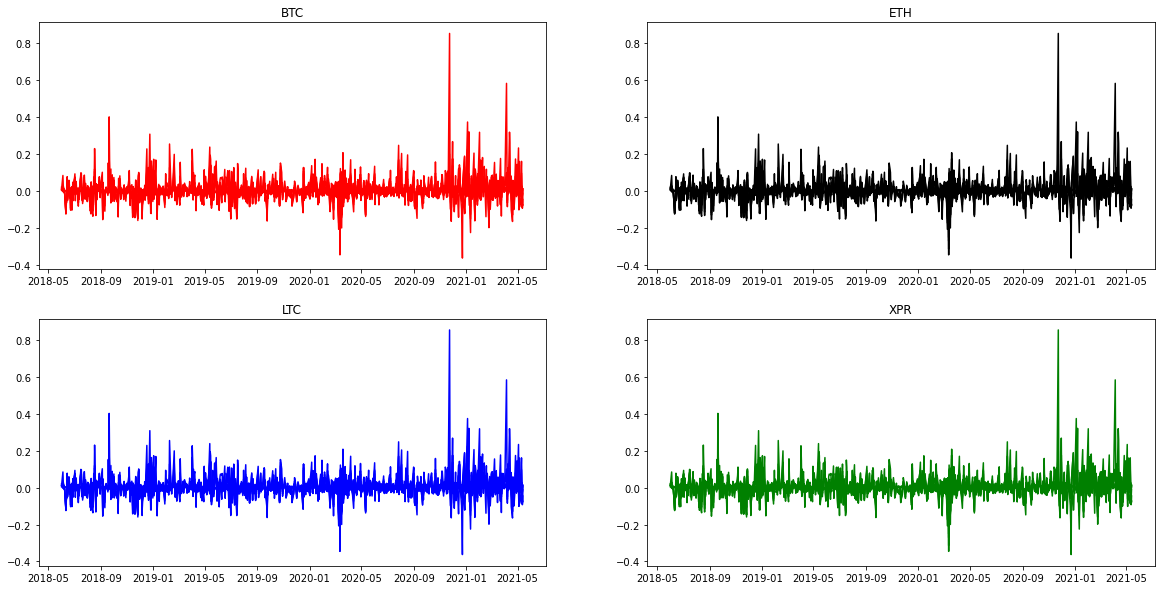

In [25]:
#visualize the data for cryptocurrency on the separate graphs side by side

fig, axs = plt.subplots(2,2, figsize=(20,10))

axs[0,0].plot(return_portfolio_df['Closing Price (USD)'], c='r')
axs[0,0].set_title('BTC')
axs[0,1].plot(return_portfolio_df['Closing Price (USD)'],c='k')
axs[0,1].set_title('ETH')
axs[1,0].plot(return_portfolio_df['Closing Price (USD)'],c='b')
axs[1,0].set_title ('LTC')
axs[1,1].plot(return_portfolio_df['Closing Price (USD)'], c='g')
axs[1,1].set_title('XPR')
plt.show()

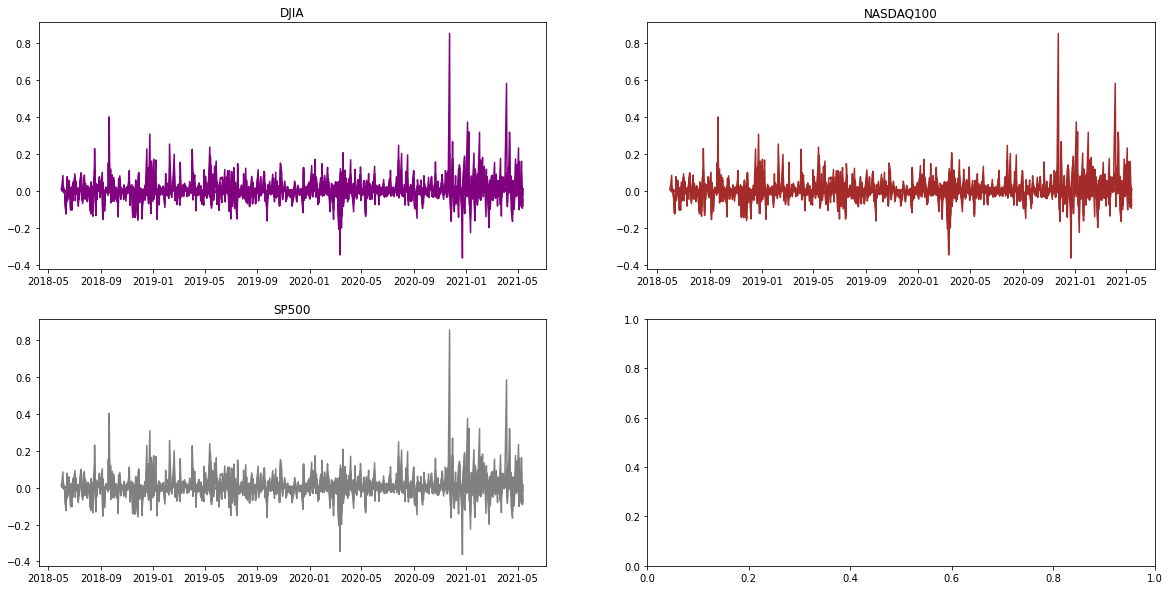

In [26]:
#visualize the data for indexes on the separate graphs side by side

fig, axs = plt.subplots(2,2, figsize=(20,10))

axs[0,0].plot(return_portfolio_df['Closing Price (USD)'], c='purple')
axs[0,0].set_title('DJIA')
axs[0,1].plot(return_portfolio_df['Closing Price (USD)'],c='brown')
axs[0,1].set_title('NASDAQ100')
axs[1,0].plot(return_portfolio_df['Closing Price (USD)'],c='gray')
axs[1,0].set_title ('SP500')
plt.show()

## * What do we see?

We can clearly see a spikes of volatility in the beginning of each year of analyzed period. It might be connected with companies posting yearly results  and individuals starting preparing for a tax season.
We can see the bid down spike in the beginning of 2020 which is clearly associated with the beginning of a lockdown and 2020 following  rally with still grate volatility in the middle of 2021.
We can't time the market, but we can understand its behavior to not make irrational decisions based on market fluctuations. To make our portfolio more resilient to market fluctuations we have to explore volatility. 

In [27]:
#Visualize daily return dataframe with interactive box plot 
 
return_portfolio_df ['Closing Price (USD)'].hvplot.box(xlabel="Date", title = " Daily Returns volatily", width = 800, height=700)


:BoxWhisker   [Variable]   (value)

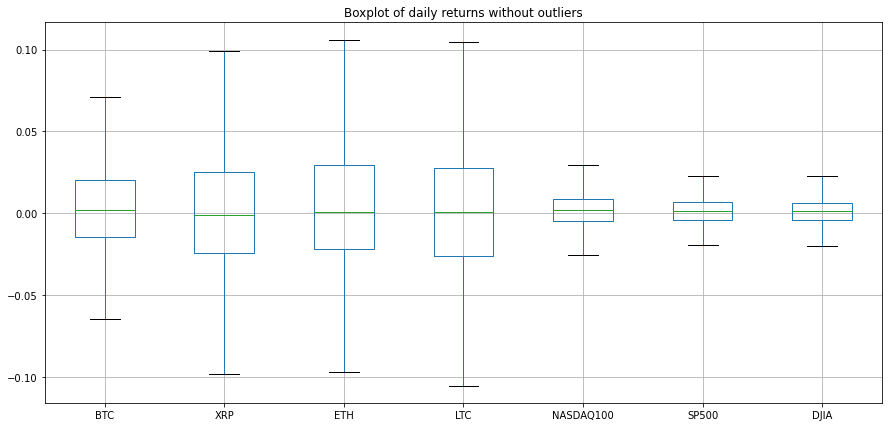

In [28]:
# Show return_portfolio_df dataframe in the boxplot without outliers to better understand volotility

return_portfolio_df ['Closing Price (USD)'].boxplot(showfliers=False, figsize=(15,7))
plt.title('Boxplot of daily returns without outliers')
plt.show()

## * What do we see?

Based on the summary statistics and the box plot, the cryptocurrency with the smallest spread is BTC, and the one with the largest is XRP. To validate that conclusion we need to calculate standard deviation and to know what does it mean for our investment we should calculate Sharpe ratio to see if greater volatility will bring us better returns.
 Obviously indexes introduces less volatility as they more diversify, zooming in the box plot with outliers shows more volatility for Dow Johnes, But the core volatility without outliers is slightly greater for Nasdaq100. We should calculate standard deviation to explore volatility, and calculate Sharpe ratio to making sure we not missing out on opportunity.  


##  Calculate and visualize cumulative returns 

In [29]:
#Calculate Cumulative returns

cumulative_returns_df = (1 +  return_portfolio_df).cumprod().dropna() 

#Print  last 5 rows of the dataframe to see the returns over a the whole analyzed period of time

cumulative_returns_df.tail()

Closing Price (USD)                                          \
Currency                   BTC       XRP       ETH       LTC NASDAQ100   
Date                                                                     
2021-05-07            7.623816  2.542248  6.035441  2.849398  1.969024   
2021-05-10            7.438041  2.322786  7.004998  3.124957  1.917279   
2021-05-11            7.552585  2.384718  7.239456  3.163989  1.916158   
2021-05-12            6.961748  2.225660  7.141714  2.870032  1.865978   
2021-05-13            6.643525  2.198648  6.598904  2.659800  1.881409   

                                
Currency       SP500      DJIA  
Date                            
2021-05-07  1.564576  1.424393  
2021-05-10  1.548248  1.422962  
2021-05-11  1.534819  1.403563  
2021-05-12  1.501898  1.375650  
2021-05-13  1.520181  1.393417

In [30]:
#Plot the cumulative returns into interactive plot

cumulative_returns_df['Closing Price (USD)'].hvplot(title="Cumulative Returns", width = 800, height=500)

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

##  Calculate mean value and standard deviation for each asset class 

In [31]:
#display the mean value of each asset on the portfolio

return_portfolio_df.mean()

                     Currency 
Closing Price (USD)  BTC          0.003550
                     XRP          0.003426
                     ETH          0.004285
                     LTC          0.003126
                     NASDAQ100    0.000993
                     SP500        0.000671
                     DJIA         0.000564
dtype: float64

In [32]:
#display the standard deviation of each asset on the portfolio

return_portfolio_df.std()

                     Currency 
Closing Price (USD)  BTC          0.044661
                     XRP          0.072538
                     ETH          0.059263
                     LTC          0.060329
                     NASDAQ100    0.016840
                     SP500        0.014611
                     DJIA         0.015296
dtype: float64

##  Calculate and visualize correlation of the assets in the portfolio

In [33]:
#Explore correlation of the assets withing the portfolio

correlation_cryptocurrencies =  return_portfolio_df.corr()
correlation_cryptocurrencies

Closing Price (USD)                      \
Currency                                      BTC       XRP       ETH   
                    Currency                                            
Closing Price (USD) BTC                  1.000000  0.460920  0.763228   
                    XRP                  0.460920  1.000000  0.566911   
                    ETH                  0.763228  0.566911  1.000000   
                    LTC                  0.781240  0.534877  0.813104   
                    NASDAQ100            0.183298  0.176465  0.202696   
                    SP500                0.185274  0.176517  0.212004   
                    DJIA                 0.173690  0.165519  0.207660   

                                                                       
Currency                            LTC NASDAQ100     SP500      DJIA  
                    Currency                                           
Closing Price (USD) BTC        0.781240  0.183298  0.185274  0.173690  
                    XRP        0.534877  0.176465  0.176517  0.165519  
                    ETH        0.813104  0.202696  0.212004  0.207660  
                    LTC        1.000000  0.188100  0.189586  0.179523  
                    NASDAQ100  0.188100  1.000000  0.927506  0.844429  
                    SP500      0.189586  0.927506  1.000000  0.973383  
                    DJIA       0.179523  0.844429  0.973383  1.000000

<AxesSubplot:xlabel='None-Currency', ylabel='None-Currency'>

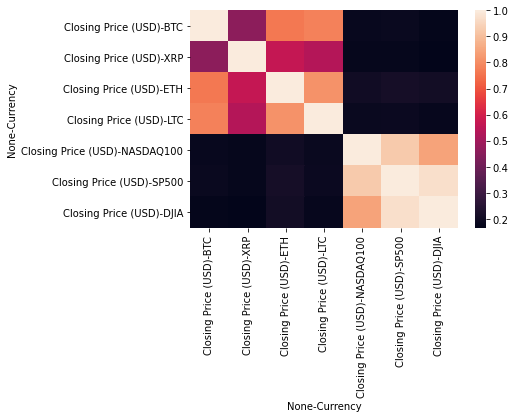

In [34]:
#Visualize the correlation
#correlation_cryptocurrencies["Closing Price (USD)"].hvplot.heatmap( x= "Currency", y="Currency", width = 1000, height=500)
sns.heatmap(correlation_cryptocurrencies )

## * What do we see?

 We can see on a last graph that Indexes and Crypto are not highly correlated which is a great news for portfolio devercification!
 
 Based on the summary of cumulative returns, the cryptocurrency winner is Bitcoin, followed by Ethirium -  with the smallest spread of volatility. They are not highly correlated which introduces diversity, with a smallest standard deviation, which is all the good sighns in favor of those cryptocurrencies among other we picked to analyse.
 
 All of the indexes are highly correlated, with SnP500 and Nasdaq100 introdusing greater returns. However Standard Deviation for Dow Jones is much smaller and it shows to be less volotile than Nasdaq100, so lets take a look on Sharpe Ration to make a final desision about break of our portfolio.  
 

## Step 3. Analyze risk/return connection with Sharpe ratios to make a final decision about favorable assets.

##  Calculate the annualized average daily return values and sort the values from smallest to largest.

In [35]:
# The number of trading days is set to 252 for use throughout these calculations
trading_days = 252

# Calculate the annual average daily returns for the crypto currencies
# Use the Pandas mean function to calculate the average daily return for each cryptocurrency 
# Then multiply that value by the number of trading days in a year, using the trading_days variable set above 
annual_average_returns = return_portfolio_df.mean() * trading_days

# Sort the annual average returns for the cryptocurrencies from lowest to highest
annual_average_returns.sort_values()

                     Currency 
Closing Price (USD)  DJIA         0.142218
                     SP500        0.169157
                     NASDAQ100    0.250343
                     LTC          0.787671
                     XRP          0.863335
                     BTC          0.894705
                     ETH          1.079869
dtype: float64

## Calculate the annualized standard deviations for the DataFrame of portfolio daily returns. Sort the values from smallest to largest.

In [36]:
# Calculate the annualized standard deviation for the cryptocurrencies
# Use the Pandas std function to calculate the standard deviation for each cryptocurrency
# Multiply the standard deviation by the square root (using the NumPy sqrt function) of the number of trading days
annual_standard_deviation = return_portfolio_df.std() * np.sqrt(trading_days)

# Sort the annual standard deviations for the cryptocurrencies from lowest to highest
annual_standard_deviation.sort_values()

                     Currency 
Closing Price (USD)  SP500        0.231942
                     DJIA         0.242816
                     NASDAQ100    0.267328
                     BTC          0.708965
                     ETH          0.940776
                     LTC          0.957691
                     XRP          1.151510
dtype: float64

##  Calculate the Sharpe ratio for each asset. Sort the Sharpe ratios from smallest to largest.

In [37]:
# Calculate Sharpe ratios by dividing the annual average return of the cryptocurrencies 
# by the annual standard deviation of the cryptocurrencies
sharpe_ratios = annual_average_returns / annual_standard_deviation

# Sort the Sharpe ratios for the cryptocurrencies from lowest to highest
sharpe_ratios.sort_values()

                     Currency 
Closing Price (USD)  DJIA         0.585705
                     SP500        0.729310
                     XRP          0.749741
                     LTC          0.822469
                     NASDAQ100    0.936463
                     ETH          1.147849
                     BTC          1.261987
dtype: float64

##  Plot the Sharpe ratios in a bar chart.

In [38]:
# Using the Pandas plot.bar function, visualize the Sharpe ratios for the cryptocurrencies in a bar chart
# Be sure to adjust the figure size and include a title
sharpe_ratios.hvplot.bar(figsize=(20, 30), title="Sharpe Ratios", color="purple")

:Bars   [Currency]   (0)

## * Conclusion

The assests have all behaved very well over the period in question posting a excellent risk to return values. Based on the the Sharpe ratio, we make a desision to invest in the assets in following order:
20% = Bitcoin, 
15% = Ethereum, 
10% = Ripple, 
5% = Litecoin, 
25% = SnP500,
15% =  Nasdaq100
10% =Dow Jones

## Part II.

##  Step 4. Financial Planning with JSON for Crypto

In [106]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv()

True

#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [42]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"
xrp_url = "https://api.alternative.me/v2/ticker/Ripple/?convert=USD"
ltc_url = "https://api.alternative.me/v2/ticker/Litecoin/?convert=USD"

####  Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC), Ethereum (ETH), Ripple (XRP), Litecoin (LTC) by using the API endpoints that the starter code supplied.

In [43]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = requests.get(btc_url ).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable


print(json.dumps(btc_response, indent=4, sort_keys=True))

{
    "data": {
        "1": {
            "circulating_supply": 18713256,
            "id": 1,
            "last_updated": 1621377552,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 809026613968,
                    "percent_change_1h": 0.40376791559798,
                    "percent_change_24h": 0.325039204055553,
                    "percent_change_7d": -22.4916933066326,
                    "percentage_change_1h": 0.40376791559798,
                    "percentage_change_24h": 0.325039204055553,
                    "percentage_change_7d": -22.4916933066326,
                    "price": 43328.0,
                    "volume_24h": 65956983724
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 18713256,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurrencie

In [44]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = requests.get(eth_url ).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(eth_response, indent=4, sort_keys=True))


{
    "data": {
        "1027": {
            "circulating_supply": 115929789,
            "id": 1027,
            "last_updated": 1621377545,
            "max_supply": 0,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 396347142757,
                    "percent_change_1h": -0.0137762309486269,
                    "percent_change_24h": 5.62101228682778,
                    "percent_change_7d": -13.8803592451867,
                    "percentage_change_1h": -0.0137762309486269,
                    "percentage_change_24h": 5.62101228682778,
                    "percentage_change_7d": -13.8803592451867,
                    "price": 3427.22,
                    "volume_24h": 60644428981
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 115929789,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocu

In [45]:
# Using the Python requests library, make an API call to access the current price XRP
xrp_response = requests.get(xrp_url ).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(xrp_response, indent=4, sort_keys=True))


{
    "data": {
        "52": {
            "circulating_supply": 46135372183,
            "id": 52,
            "last_updated": 1621377551,
            "max_supply": 100000000000,
            "name": "XRP",
            "quotes": {
                "USD": {
                    "market_cap": 73776249495,
                    "percent_change_1h": 0.538883682832828,
                    "percent_change_24h": 9.49409846543715,
                    "percent_change_7d": 14.9880369567646,
                    "percentage_change_1h": 0.538883682832828,
                    "percentage_change_24h": 9.49409846543715,
                    "percentage_change_7d": 14.9880369567646,
                    "price": 1.61,
                    "volume_24h": 13961269951
                }
            },
            "rank": 4,
            "symbol": "XRP",
            "total_supply": 46135372183,
            "website_slug": "ripple"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurrenci

In [46]:
# Using the Python requests library, make an API call to access the current price LTC
ltc_response = requests.get(ltc_url ).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(ltc_response, indent=4, sort_keys=True))


{
    "data": {
        "2": {
            "circulating_supply": 66752415,
            "id": 2,
            "last_updated": 1621377560,
            "max_supply": 84000000,
            "name": "Litecoin",
            "quotes": {
                "USD": {
                    "market_cap": 19785591964,
                    "percent_change_1h": 0.178096881847855,
                    "percent_change_24h": 6.62813691848179,
                    "percent_change_7d": -17.9808358959156,
                    "percentage_change_1h": 0.178096881847855,
                    "percentage_change_24h": 6.62813691848179,
                    "percentage_change_7d": -17.9808358959156,
                    "price": 296.72,
                    "volume_24h": 10530423248
                }
            },
            "rank": 10,
            "symbol": "LTC",
            "total_supply": 66752415,
            "website_slug": "litecoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurrenci

####  Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [47]:
# Navigate the BTC response object to access the current price of BTC

btc_symbol = btc_response['data']['1']['symbol']
print(f"The symbol for Bitcoin is {btc_symbol}")

# Print the current price of BTC
btc_price=btc_response['data']['1']['quotes']['USD']['price']
print(f"The price for Bitcoin is ${btc_price}")



The symbol for Bitcoin is BTC
The price for Bitcoin is $43328.0


In [48]:
# Navigate the ETH response object to access the current price of ETH
eth_symbol = eth_response['data']['1027']['symbol']
print(f"The symbol for Etherium is {eth_symbol}")

# Print the current price of ETH
eth_price=eth_response['data']['1027']['quotes']['USD']['price']
print(f"The price for Etherium is ${eth_price}")


The symbol for Etherium is ETH
The price for Etherium is $3427.22


In [49]:
# Navigate the XRP response object to access the current price of XRP
xrp_symbol = xrp_response['data']['52']['symbol']
print(f"The symbol for Etherium is {xrp_symbol}")

# Print the current price of XRP
xrp_price=xrp_response['data']['52']['quotes']['USD']['price']
print(f"The price for Ripple is ${xrp_price}")


The symbol for Etherium is XRP
The price for Ripple is $1.61


In [50]:
# Navigate the LTC response object to access the current price of LTC
ltc_symbol = ltc_response['data']['2']['symbol']
print(f"The symbol for Etherium is {ltc_symbol}")

# Print the current price of LTC
ltc_price=ltc_response['data']['2']['quotes']['USD']['price']
print(f"The price for Litecoin is ${ltc_price}")


The symbol for Etherium is LTC
The price for Litecoin is $296.72


In [51]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 20000/btc_price
eth_coins = 15000/eth_price
xrp_coins = 10000/xrp_price
ltc_coins = 5000/ltc_price


###  Calculate the value, in US dollars, of the current amount of each cryptocurrency 

In [53]:
# Compute the current value of the BTC holding 
btc_value = btc_coins * btc_price

# Print current value of your holding in BTC
print(f"The value of Bitcoin in the portfolio {btc_value:.2f}")


The value of Bitcoin in the portfolio 20000.00


In [54]:
# Compute the current value of the ETH holding 
eth_value = eth_coins * eth_price

# Print current value of your holding in ETH
print(f"The value of Etheriun in the portfolio {eth_value:.2f}")


The value of Etheriun in the portfolio 15000.00


In [55]:
# Compute the current value of the XPR holding 
xrp_value = xrp_coins * xrp_price

# Print current value of your holding in XPR
print(f"The value of Ripple in the portfolio {xrp_value:.2f}")

The value of Ripple in the portfolio 10000.00


In [56]:
# Compute the current value of the LTC holding 
ltc_value = ltc_coins * ltc_price

# Print current value of your holding in LTC
print(f"The value of Litecoin in the portfolio {ltc_value:.2f}")

The value of Litecoin in the portfolio 5000.00


#### Step 5. Alpaca API call. Review the total number of shares held in indexes (SPY), (DIA) and (QQQ).

####  In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

####  Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [58]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")


####  Set the parameters for the Alpaca API call:


In [90]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers = ["SPY", "DIA", "QQQ"]

# Set timeframe to 1D 
timeframe = "1D"

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
start_date = pd.Timestamp("2021-05-12", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-05-12", tz="America/New_York").isoformat()

####  Get the current closing prices for `SPY`, `QQQ` and `DIA` by using the Alpaca `get_barset` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_barset` function.

In [91]:
# Use the Alpaca get_barset function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df


# Review the first 5 rows of the Alpaca DataFrame
df_portfolio.head()


DIA                                      QQQ  \
                             open    high     low   close   volume    open   
time                                                                         
2021-05-12 00:00:00-04:00  341.55  342.23  335.71  336.03  6624686  320.23   

                                                             SPY               \
                             high  low   close    volume    open    high  low   
time                                                                            
2021-05-12 00:00:00-04:00  322.62  316  316.97  79362277  411.23  412.59  404   

                                              
                            close     volume  
time                                          
2021-05-12 00:00:00-04:00  405.44  117671634

#### Navigating the Alpaca response DataFrame.

In [99]:

# Access the closing price for Dow Jones from the Alpaca DataFrame
# Converting the value to a floating point number
dia_close_price=df_portfolio["DIA"]["close"][0]


# Print the AGG closing price
print(f"DIA closing price= {dia_close_price:.2f}")



DIA closing price= 336.03


In [93]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number

spy_close_price=df_portfolio["SPY"]["close"][0]

# Print the SPY closing price

print(f"SPY closing price= {spy_close_price:.2f}")

SPY closing price= 405.44


In [94]:
# Access the closing price for QQQ from the Alpaca DataFrame
# Converting the value to a floating point number

qqq_close_price=df_portfolio["QQQ"]["close"][0]

# Print the SPY closing price

print(f"QQQ closing price= {qqq_close_price:.2f}")

QQQ closing price= 316.97


In [95]:
# Current amount of shares .
spy_shares = 25000/ spy_close_price
dia_shares = 15000/ qqq_close_price
qqq_shares = 10000/dia_close_price

####  Calculate the value, in US dollars, of the current amount of shares in each index part of the portfolio

In [100]:
# Calculate the current value of the bond portion of the portfolio
dia_value=dia_shares*dia_close_price


# Print the current value of the bond portfolio
print(f"Current value of the Dow Jones portfolio = {dia_value:.2f}")


Current value of the Dow Jones portfolio = 15901.98


In [107]:
# Calculate the current value of the SnP500 portion of the portfolio
spy_value=spy_shares*spy_close_price

# Print the current value of the stock portfolio
print(f"Current value of the SnP500 portfolio = {spy_value:.2f}")



Current value of the SnP500 portfolio = 25000.00


In [102]:
# Calculate the current value of the NASDAQ100 portion of the portfolio
qqq_value=qqq_shares*qqq_close_price


# Print the current value of the bond portfolio
print(f"Current value of the NASDAQ100 portfolio = {qqq_value:.2f}")


Current value of the NASDAQ100 portfolio = 9432.79


###  Step 6. Create a pie visualization of resulting portfolio

####  Create a Python list named `savings_data` that has elements for each asset.

In [103]:
# Consolidate financial assets data into a Python list
savings_data= [btc_value, eth_value, xrp_value, ltc_value, dia_value, spy_value,qqq_value]

# Review the Python list savings_data
savings_data
    

[20000.0,
 15000.0,
 10000.0,
 5000.000000000001,
 15901.978105183454,
 25000.0,
 9432.788739100677]

####  Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame.

In [104]:
# Create a Pandas DataFrame called savings_df 
savings_df=pd.DataFrame(savings_data, columns=["Amount"], index=["BTC","ETH","XRP","LTC","Dow Jones","SnP500","Nasdaq100"])
# Display the savings_df DataFrame
savings_df


Amount
BTC        20000.000000
ETH        15000.000000
XRP        10000.000000
LTC         5000.000000
Dow Jones  15901.978105
SnP500     25000.000000
Nasdaq100   9432.788739

####  Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

<AxesSubplot:title={'center':'Portfolio composition'}, ylabel='Amount'>

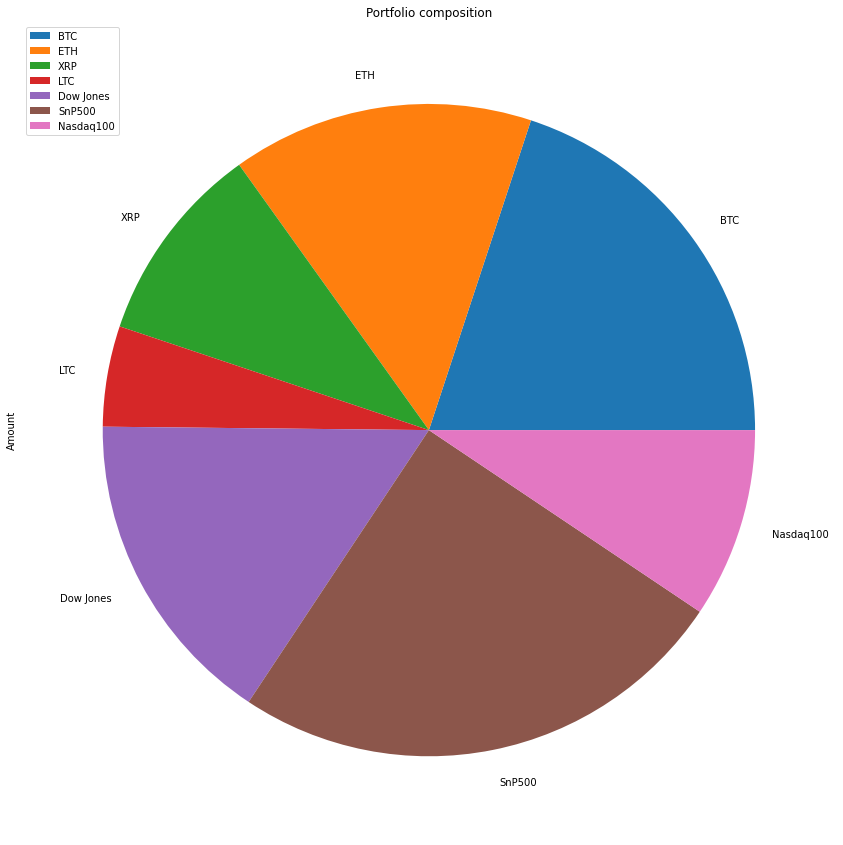

In [105]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
savings_df.plot.pie(y='Amount',title="Portfolio composition", figsize=(15, 15))
